In [32]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\Owner\Downloads')
os.getcwd()

cars = pd.read_csv("cars.csv")

In [8]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [7]:
cars.tail()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,US


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   Horsepower    406 non-null    int64  
 5   Weight        406 non-null    int64  
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 25.4+ KB


In [9]:
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


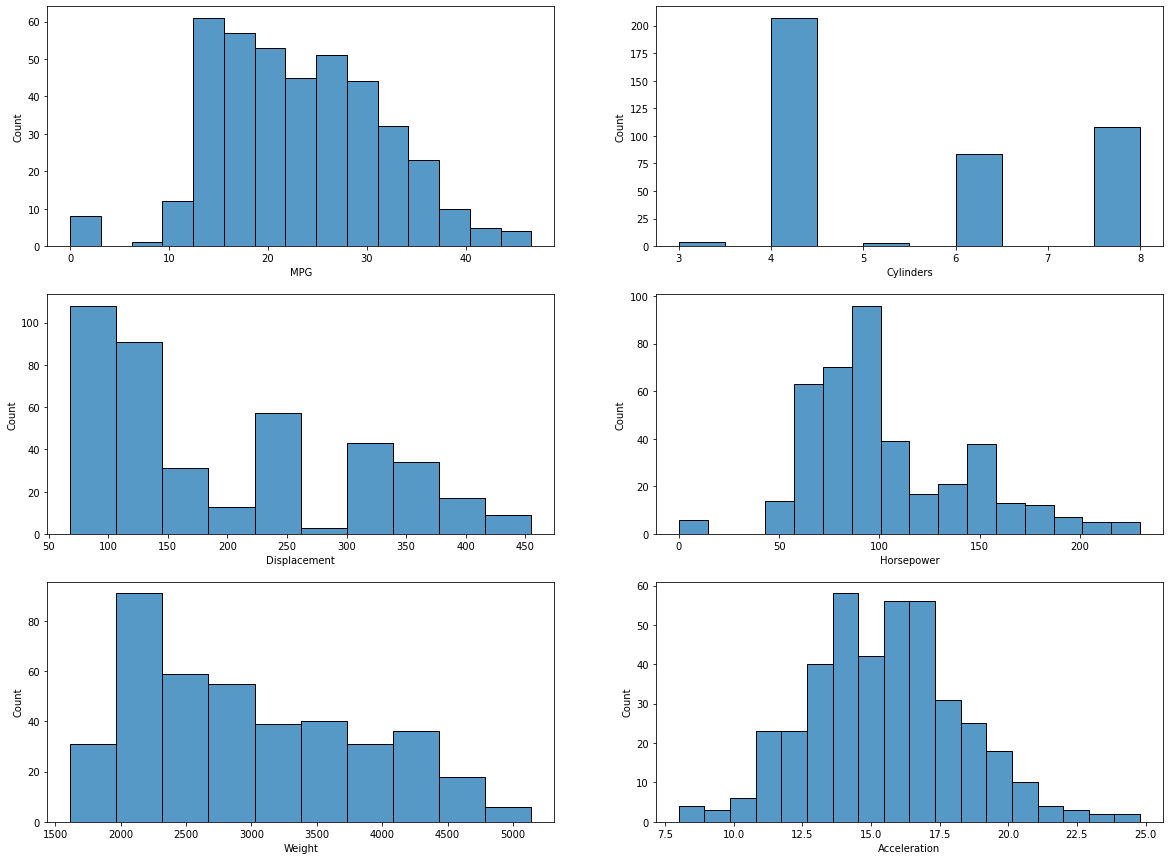

<ipython-input-31-079d1188d904>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(3,2,plot_counter)


In [31]:
#Analysis of Numerical Columns
num_df = cars.select_dtypes(exclude = 'object').copy()


fig = plt.figure(figsize=(20,15))

plot_counter=1
for i in num_df.columns:
    ax1 = fig.add_subplot(3,2,plot_counter) 
    sns.histplot(data = cars, x = i, ax = ax1)
    if plot_counter < 6:
        plot_counter = plot_counter+1
    else:
        plt.show()
        plot_counter = 1
plt.show()

In [34]:
#Standardizing Values

mean_values = np.mean(cars[['Horsepower','Weight','Acceleration','Displacement','MPG']])
std_values = np.std(cars[['Horsepower','Weight','Acceleration','Displacement','MPG']])

list_dictonary_keys = ['Horsepower','Weight','Acceleration','Displacement','MPG']

dic = {}
for i in list_dictonary_keys:
    dic[i] = (cars[i]-mean_values[i])/std_values[i]

data=pd.DataFrame(dic)
data.head()

,Horsepower,Weight,Acceleration,Displacement,MPG
0,0.654064,0.620107,-1.257080,1.070876,-0.601952
1,1.518887,0.843522,-1.435658,1.481208,-0.959460
2,1.148248,0.539725,-1.614235,1.175844,-0.601952
3,1.148248,0.536179,-1.257080,1.042248,-0.840290
4,0.901156,0.555092,-1.792813,1.023163,-0.721121


In [54]:
#Splitting into dataset into train and test

X=cars[['Horsepower','Weight','Acceleration','Displacement']]
Y=cars[['MPG']]
x=data[['Horsepower','Weight','Acceleration','Displacement']]
y=data[['MPG']]

=x.iloc[:301,:]
x_test=x.iloc[301:,:]

y_train=y.iloc[:301,:]
y_test=y.iloc[301:,:]


Y_train=cars.iloc[:301,:]
Y_test=cars.iloc[301:,:]

print(x_train.shape)
print(Y_train.shape)

(301, 4)
(301, 9)


In [207]:
#Calculating Distance using Euclidean Distance
def euclidian_dist(x,y):
    sum=0
    for i in range(len(x)):
        dist=((x[i]-y[i])**2)
        sum=sum+dist
    eu=np.sqrt(sum)
    return eu   

In [180]:
# # Incase you want to use Manhattan Distance for calculating the distance

# def manhattan_distance(a, b):
#     return sum(abs(e1-e2) for e1, e2 in zip(a,b))


# row1 = [10, 20, 15, 10, 5]
# row2 = [12, 24, 18, 8, 7]
# # calculate distance
# dist = manhattan_distance(row1, row2)
# print(dist)

In [208]:
distance_data = {}
def KNN_1(x_train,x):
    l=[]
    for i in range(len(x_train)):
        distance_value =euclidian_dist(x_train.loc[i],x)    #calculating euclidian distance 
        distance_data[i] = {'distance': distance_value,'MPG':Y['MPG'][i]}       
    return distance_data

In [209]:
distances = KNN_1(x_train,x_test.iloc[2])

min_distance = distances[0]['distance']
min_MPG = 0
for key, value in distances.items():    
    if(distances[key]['distance'] < min_distance):     
        min_MPG = distances[key]['MPG']
min_MPG

31.9

In [210]:
def KNN(x_train,x,limit_values):
    minimum_val = {}
    for i in range(len(x_train)):
        eu_result = euclidian_dist(x_train.loc[i],x)    #calculating euclidian distance 
        minimum_val[eu_result]= Y.loc[i]                                   
                                                        #comparing current distance with min dist present in list
    counter = 0
    sum_values = 0 
    average = 0
    for w in sorted(minimum_val.keys())[:limit_values]:
        sum_values += minimum_val[w]
    average = sum_values/limit_values
    return average

In [215]:
Y_Predicted = KNN(x_train,x_test.iloc[2],3)
Y_Predicted

MPG    26.033333
Name: 262, dtype: float64

In [214]:
Y_test.iloc[2]

Car             AMC Spirit DL
MPG                      27.4
Cylinders                   4
Displacement            121.0
Horsepower                 80
Weight                   2670
Acceleration             15.0
Model                      79
Origin                     US
Name: 303, dtype: object

In [220]:
limit_values = int(input("Enter the values of limit: "))
for K in range(1,limit_values+1):
    predicted_value_list=[]
    for i in range(len(x_test)):
        predicted_values=KNN(x_train,x_test.iloc[i],K)
        predicted_value_list.append(predicted_values)
    
    actual_value_list = Y_test.MPG.tolist()
    error_list = np.array(predicted_value_list)-np.array(actual_value_list)
    RMSE = np.sqrt(np.sum(error_list*error_list))
    print("K value: ",K," & RMSE:",RMSE)

Enter the values of limit: 4
K value:  1  & RMSE: 1083.3352251265533
K value:  2  & RMSE: 1050.7440399545458
K value:  3  & RMSE: 1045.618759395603
K value:  4  & RMSE: 1049.4810181704097
